<h1 style="font-size:40px;"><center>Exercise II:<br> Convolutional Neural Networks
</center></h1>

## Short summary
In this exercise, we will design a CNN to classify rgb images. These folder has **three files**: 
- **configClassifier.py:** this involves definitions of all parameters and data paths
- **utilsClassifier.py:** includes utility functions required to grab and visualize data 
- **runClassifier.ipynb:** contains the script to design, train and test the network 

Make sure that before running this script, you created an environment and **installed all required libraries** such 
as keras.

## The data
There exists also a subfolder called **data** which contains the traning, validation, and testing data each has both RGB input images together with the corresponding ground truth images.


## The exercises
As for the previous lab all exercises are found below.


## The different 'Cells'
This notebook contains several cells with python code, together with the markdown cells (like this one) with only text. Each of the cells with python code has a "header" markdown cell with information about the code. The table below provides a short overview of the code cells. 

| #  |  CellName | CellType | Comment |
| :--- | :-------- | :-------- | :------- |
| 1 | Init | Needed | Sets up the environment|
| 2 | Ex | Exercise 1| A class definition of a CNN model  |
| 3 | Loading | Needed | Loading parameters and initializing the model |
| 4 | Stats | Needed | Show data distribution |
| 5 | Ex | Exercise 2 | Data augementation |
| 6 | Data | Needed | Generating the data batches |
| 7 | Debug | Needed | Debugging the data |
| 8 | Device | Needed | Selecting CPU/GPU |
| 9 | Optimization | Exercise 2 | Selecting an optimization method |
| 10 | Training | Exercise 1-2-3 | Training the model   |
| 11 | Testing | Exercise 1-2-3| Testing the  method   |
| 12 | Confusion matrix | Information | Plotting the confusion matrix|
| 13 | Plotting | Information  | View some of test samples |
| 13 | Plotting | Information  | View layer activations|


In order for you to start with the exercise you need to run all cells. It is important that you do this in the correct order, starting from the top and work you way down the cells. Later when you have started to work with the notebook it may be easier to use the command "Run All" found in the "Cell" dropdown menu.

## Writing the report
First the report should be written within this notebook. We have prepared the last cell in this notebook for you where you should write the report. The report should contain 4 parts:

* Name:
* Introduction: A **few** sentences where you give a small introduction of what you have done in the lab.
* Answers to questions: For each of the questions provide an answer. It can be short answers or a longer ones depending on the nature of the questions, but try to be effective in your writing.
* Conclusion: Summarize your findings in a few sentences.
  

1) We first start with importing all required modules

In [335]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras 
from configClassifier import *
from utilsClassifier import *
from sklearn.metrics import confusion_matrix
import seaborn as sns
from datetime import datetime
import os
import pprint

# import the necessary packages
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.models import Model
from keras.callbacks import TensorBoard


2) Here, we have the network model class definition. In this class, the most important function is the one called **create_model()**. As defined in the exercises section, your task is to update the network architecture defined in this function such that the network will return the highest accuracy for the given training, validation, and testing data.

In [336]:
class ClassifierDNNModel():
    def __init__(self, num_classes=10, batch_size=32, inputShape=(64,64,3), dropout_prob=0.25):
        # super(MyModel, self).__init__(name='my_model')
        self.num_classes = num_classes
        self.batch_size = batch_size
        self.inputShape = inputShape
        self.dropout_prob = dropout_prob

    def create_model(self):
        model = Sequential()
    
        chanDim = -1
        model.add(Conv2D(150, (5, 5), padding="same"))
        model.add(BatchNormalization(1))
        model.add(tf.keras.layers.LeakyReLU(alpha=0.01))
        model.add(Dropout(0.1))
        model.add(MaxPooling2D(pool_size=(5, 5)))


        model.add(Conv2D(150, (5, 5), padding="same"))
        model.add(BatchNormalization(1))
        model.add(tf.keras.layers.LeakyReLU(alpha=0.01))
        model.add(Dropout(0.1))
        model.add(MaxPooling2D(pool_size=(5, 5)))


        model.add(Conv2D(150, (3, 3), padding="same"))
        model.add(BatchNormalization(1))
        model.add(tf.keras.layers.LeakyReLU(alpha=0.01))
        model.add(Dropout(0.1))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        

        model.add(Flatten())
        model.add(Dense(2048))
        model.add(tf.keras.layers.LeakyReLU(alpha=0.01))
       
        
        # softmax classifier
        model.add(Dense(self.num_classes))
        model.add(Activation("softmax"))

        # return the constructed network architecture
        return model

    def display_activation(self, activations, col_size, row_size, act_index):
        activation = activations[act_index]
        activation_index = 0
        fig, ax = plt.subplots(row_size, col_size, figsize=(row_size * 2.5, col_size * 1.5))
        fig.suptitle("activations in layer " + str(act_index+1))

        for row in range(0, row_size):
            for col in range(0, col_size):
                ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
                activation_index += 1
        plt.show()

3) We import the network **hyperparameters** and build a simple cnn by calling the class introduced in the previous step. Please note that to change the hyperparameters, you just need to change the values in the file called **configClassifier.py.**

In [337]:
cfg = flying_objects_config()
image_shape = (cfg.IMAGE_HEIGHT, cfg.IMAGE_WIDTH, cfg.IMAGE_CHANNEL)
modelObj = ClassifierDNNModel(num_classes=len(cfg.CLASSES), batch_size=cfg.BATCH_SIZE, inputShape=image_shape, dropout_prob=cfg.DROPOUT_PROB)
model = modelObj.create_model()
print(cfg)

{'training_data_dir': '../data/FlyingObjectDataset_10K/training', 'validation_data_dir': '../data/FlyingObjectDataset_10K/validation', 'testing_data_dir': '../data/FlyingObjectDataset_10K/testing', 'fineGrained': True, 'CLASSES': ['square_red', 'square_green', 'square_blue', 'square_yellow', 'triangle_red', 'triangle_green', 'triangle_blue', 'triangle_yellow', 'circular_red', 'circular_green', 'circular_blue', 'circular_yellow'], 'NUM_CLASS': 12, 'GPU': 0, 'DROPOUT_PROB': 0.5, 'IMAGE_WIDTH': 128, 'IMAGE_HEIGHT': 128, 'IMAGE_CHANNEL': 3, 'NUM_EPOCHS': 10, 'BATCH_SIZE': 32, 'LEARNING_RATE': 0.001, 'LR_DECAY_FACTOR': 0.1, 'PRINT_EVERY': 20, 'SAVE_EVERY': 1, 'DEBUG_MODE': True, 'DATA_AUGMENTATION': True}


4) We call the utility function **show_statistics** to display the data distribution. This is just for debugging purpose.

In [338]:
#### show how the data looks like
show_statistics(cfg.training_data_dir, fineGrained=cfg.fineGrained, title=" Training Data Statistics ")
show_statistics(cfg.validation_data_dir, fineGrained=cfg.fineGrained, title=" Validation Data Statistics ")
show_statistics(cfg.testing_data_dir, fineGrained=cfg.fineGrained, title=" Testing Data Statistics ")


######################################################################
##################### Training Data Statistics #####################
######################################################################
total image number 	 10817
total class number 	 12
class square_blue 	 838 images
class triangle_red 	 917 images
class circular_green 	 912 images
class triangle_blue 	 913 images
class circular_red 	 914 images
class triangle_yellow 	 944 images
class triangle_green 	 929 images
class square_red 	 881 images
class circular_yellow 	 889 images
class circular_blue 	 911 images
class square_yellow 	 900 images
class square_green 	 869 images
######################################################################

######################################################################
##################### Validation Data Statistics #####################
######################################################################
total image number 	 2241
total class number 	 12
class ci

5) We **augment** the data by flipping the image horizontally or vertically. As described in the exercises section below, one of your tasks is to update this data augmentation part in order to increase the network efficiency.

In [339]:
# setup data
if cfg.DATA_AUGMENTATION:
    print("Data is being augmented!")
    aug_parameters = ImageDataGenerator(
         #zoom_range=0.1, # randomly zoom into images
         #rotation_range=5,  # randomly rotate images in the range (degrees, 0 to 180)
         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images
else:
    print("Data will not be augmented!")
    aug_parameters = ImageDataGenerator(
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


Data is being augmented!


6) We now create batch generators to get small batches from the entire dataset. There is no need to change these functions as they already return **normalized inputs as batches**.

In [340]:
nbr_train_data = get_dataset_size(cfg.training_data_dir)
nbr_valid_data = get_dataset_size(cfg.validation_data_dir)
nbr_test_data = get_dataset_size(cfg.testing_data_dir)
train_batch_generator = generate_classification_batches(cfg.training_data_dir, image_shape, cfg.BATCH_SIZE, cfg.CLASSES, fineGrained=cfg.fineGrained)
valid_batch_generator = generate_classification_batches(cfg.validation_data_dir, image_shape, cfg.BATCH_SIZE, cfg.CLASSES, fineGrained=cfg.fineGrained)
test_batch_generator = generate_classification_batches(cfg.testing_data_dir, image_shape, cfg.BATCH_SIZE, cfg.CLASSES, fineGrained=cfg.fineGrained)
aug_train_batch_generator = generate_augmented_classification_batches(train_batch_generator, aug_parameters)
aug_valid_batch_generator = generate_augmented_classification_batches(valid_batch_generator, aug_parameters)
print("Data batch generators are created!")

Data batch generators are created!


7) We can visualize how the data looks like for debugging purpose

In [341]:
if cfg.DEBUG_MODE:
    t_x, t_y = next(train_batch_generator)
    print('x', t_x.shape, t_x.dtype, t_x.min(), t_x.max())
    print('y', t_y.shape, t_y.dtype, t_y.min(), t_y.max())
    a_x, a_y = next(aug_train_batch_generator)
    print('x', a_x.shape, a_x.dtype, a_x.min(), a_x.max())
    print('y', a_y.shape, a_y.dtype, a_y.min(), a_y.max())

x (32, 128, 128, 3) float64 0.0 1.0
y (32, 12) float32 0.0 1.0
x (32, 128, 128, 3) float32 0.0 1.0
y (32, 12) float32 0.0 1.0


8) We select which processing unit to use, either CPU or GPU. In case of having multiple GPUs, we can still select which GPU to use.

In [342]:
if cfg.GPU >=0:
    print("creating network model using gpu " + str(cfg.GPU))
    os.environ['CUDA_VISIBLE_DEVICES'] = str(cfg.GPU)
elif cfg.GPU >=-1:
    print("creating network model using cpu ")  
    os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
    os.environ["CUDA_VISIBLE_DEVICES"] = ""

creating network model using gpu 0


9) We set the training configuration. As a part of the exercises, this function can also be updated to test different **optimization methods** such as **SGD, ADAM,** etc.

In [343]:
opt = tf.optimizers.Nadam(learning_rate=cfg.LEARNING_RATE/30,epsilon=1e-6)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer= opt, metrics=['accuracy'])
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [348]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, None, None, 150)   11400     
_________________________________________________________________
batch_normalization_76 (Batc (None, 128, None, 150)    512       
_________________________________________________________________
leaky_re_lu_112 (LeakyReLU)  (None, 128, None, 150)    0         
_________________________________________________________________
dropout_80 (Dropout)         (None, 128, None, 150)    0         
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 25, None, 150)     0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 25, None, 150)     562650    
_________________________________________________________________
batch_normalization_77 (Batc (None, 25, None, 150)   

10) We can now feed the training and validation data to the network. This will train the network for **some epochs**. Note that the epoch number is also predefined in the file called **configClassifier.py.**

In [345]:

history = model.fit(aug_train_batch_generator,
          epochs=15,#cfg.NUM_EPOCHS,
          verbose=1,
          steps_per_epoch=(nbr_train_data//cfg.BATCH_SIZE), # total batch number
          validation_steps=(nbr_valid_data // cfg.BATCH_SIZE), # total batch number
          validation_data=aug_valid_batch_generator,
          callbacks=[TensorBoard(log_dir="logs/{}".format(datetime.now().strftime("%Y%m%d-%H%M%S")), write_graph=True, write_images=False,
                                 histogram_freq=0)])


Epoch 1/15
338/338 [==============================] - 54s 159ms/step - loss: 2.0055 - accuracy: 0.2597 - val_loss: 2.0261 - val_accuracy: 0.1844
Epoch 2/15
338/338 [==============================] - 53s 157ms/step - loss: 1.4062 - accuracy: 0.4641 - val_loss: 1.8081 - val_accuracy: 0.2853
Epoch 3/15
338/338 [==============================] - 53s 158ms/step - loss: 1.1512 - accuracy: 0.5824 - val_loss: 1.4308 - val_accuracy: 0.4509
Epoch 4/15
338/338 [==============================] - 53s 156ms/step - loss: 0.8215 - accuracy: 0.7524 - val_loss: 1.0740 - val_accuracy: 0.6871
Epoch 5/15
338/338 [==============================] - 53s 157ms/step - loss: 0.5042 - accuracy: 0.8632 - val_loss: 0.8342 - val_accuracy: 0.7518
Epoch 6/15
338/338 [==============================] - 52s 155ms/step - loss: 0.3222 - accuracy: 0.9151 - val_loss: 0.6357 - val_accuracy: 0.8165
Epoch 7/15
338/338 [==============================] - 53s 157ms/step - loss: 0.2324 - accuracy: 0.9417 - val_loss: 0.5563 - val_ac

11) We can test the model with the test data

In [347]:
# testing model
test_result = model.evaluate(test_batch_generator,
                                       steps=(nbr_test_data//cfg.BATCH_SIZE))
test_loss = round(test_result[0], 4)
test_acc = round(test_result[1], 4)
print("Test Loss: ", str(test_loss), "Test Accuracy: ", str(test_acc))

69/69 [==============================] - 5s 67ms/step - loss: 0.1577 - accuracy: 0.9570
Test Loss:  0.1577 Test Accuracy:  0.957


12) We can plot a confusion matrix showing **the class-wise accuracies**

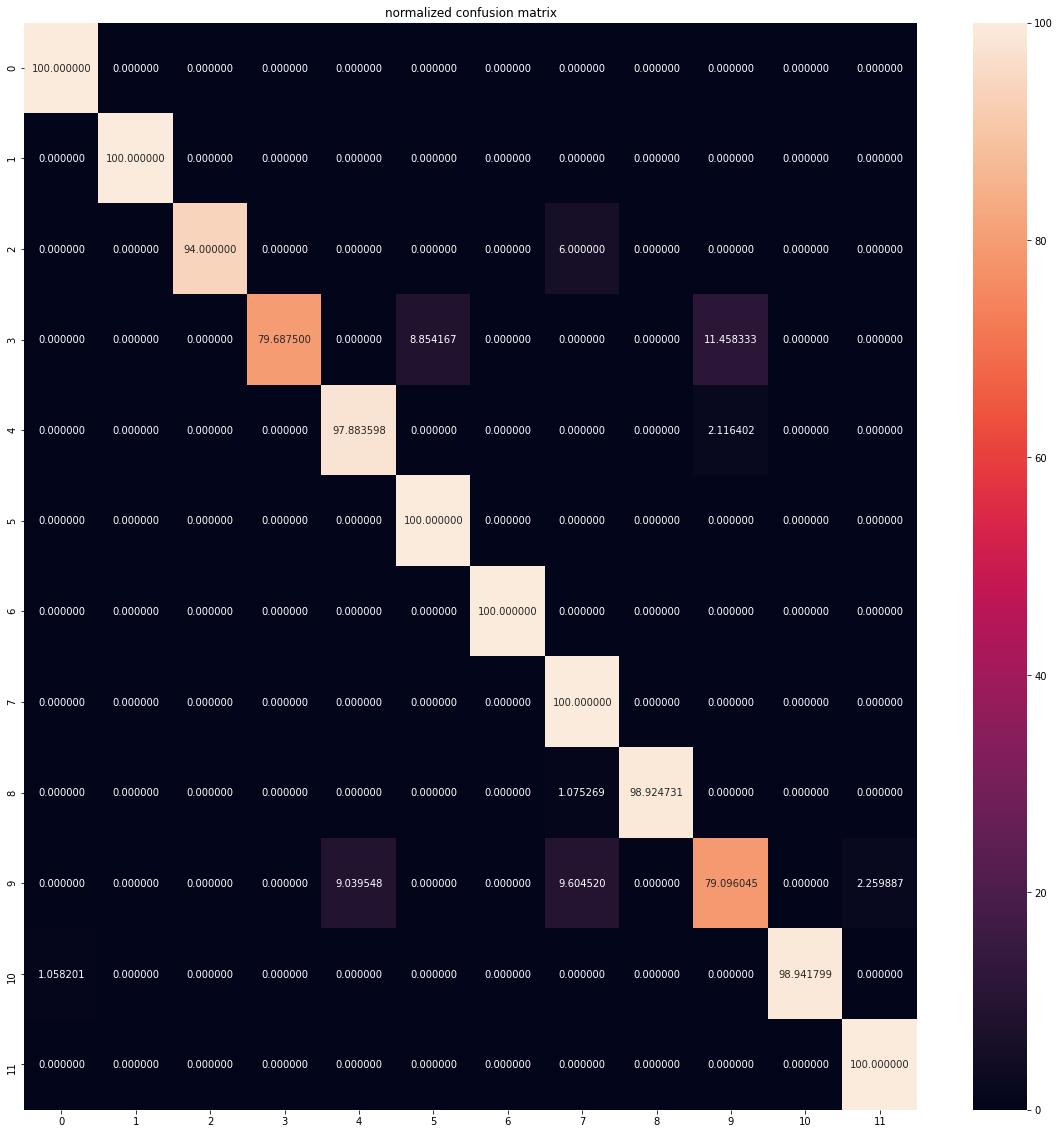

In [349]:
true_classes = []
pred_classes = []
for i in range(0, nbr_test_data//cfg.BATCH_SIZE +1):
    t_data, t_label = next(test_batch_generator)
    pred_labels = model.predict(t_data, batch_size=cfg.BATCH_SIZE)
    pred_classes.extend(np.argmax(pred_labels, axis=1))
    true_classes.extend(np.argmax(t_label, axis=1))
#print (" true classes: " + str(len(true_classes))  + " pred classes: " + str(len(pred_classes)))
confusion_mtx = confusion_matrix(np.array(true_classes), np.array(pred_classes))
plt.figure(figsize=(20, 20))
plt.title("normalized confusion matrix")
norm_confusion_mtx = 100* confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis]
sns.heatmap(norm_confusion_mtx, annot=True, fmt="f")
plt.show()

13) We can also show sample classification results

(128, 128, 3)


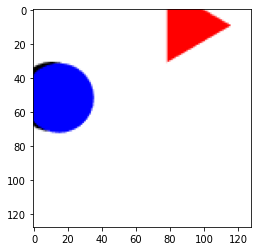

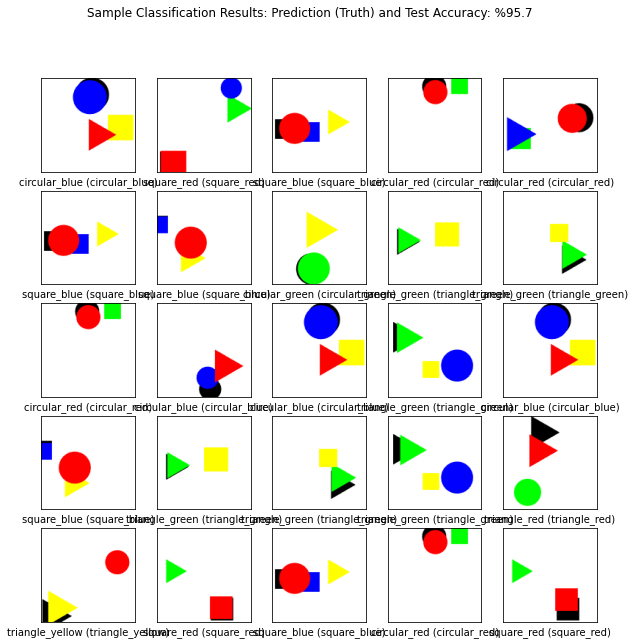

In [350]:
t_data, t_label = next(test_batch_generator)
print(t_data[0].shape)
plt.imshow(t_data[0])
pred_labels = model.predict(t_data, batch_size=cfg.BATCH_SIZE)
plot_sample_classification_results(t_data, t_label, cfg.CLASSES, pred_labels, test_acc)

14) Finally, we can visualize CNN layer activations for a given sample input 

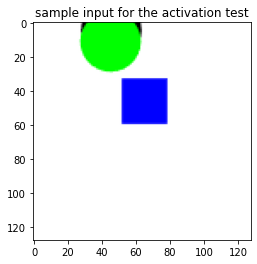

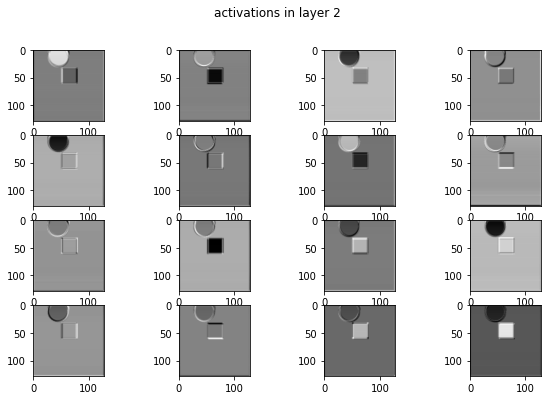

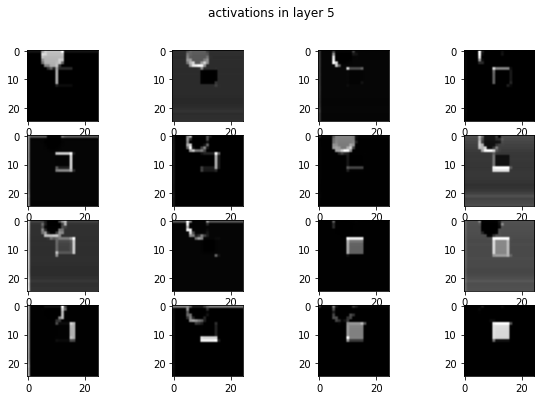

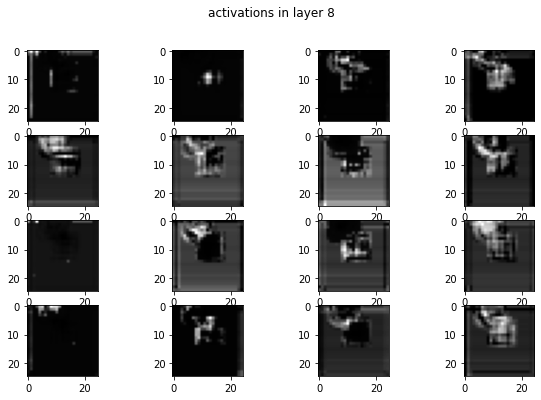

In [351]:
# Visualize CNN Layers
t_data, t_label = next(test_batch_generator)
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(t_data[10].reshape(1, cfg.IMAGE_HEIGHT, cfg.IMAGE_WIDTH, cfg.IMAGE_CHANNEL))

plt.imshow(t_data[10])
plt.title("sample input for the activation test")
modelObj.display_activation(activations, 4, 4, 1) # Displaying output of layer 2
modelObj.display_activation(activations, 4, 4, 4) # Displaying output of layer 4
modelObj.display_activation(activations, 4, 4, 7) # Displaying output of layer 5

## EXERCISES

Please do all exercises desribed below. Note that all your source code as well as the log folders must be provided as final results **before April 05, 2019.** 


#### Exercise 1)
Update the network architecture given in the function **create_model** of the class ClassifierDNNModel. 

**Hint:** You can add more convolution, max pooling layers etc. Batch normalization and dropout are other options to be considered. You can also try applying different activation functions.

#### Exercise 2) 
Use different **optimization** (e.g. ADAM, SGD, etc) and **regularization** (e.g. data augmentation, dropout) methods to increase the network accuracy. 

#### Exercise 3)
In the file **configClassifier.py**, there is a flag named as **cfg.fineGrained** which is set to **False**. This flag defines the classification granularity level. In the default setting, i.e. when it is **False**, there exist 3 class types: **Square**, **Triangle**, and **Circle**. In case of switching this flag to **True**, the class number goes to 15. Repeat previous exercises 1) and 2) after setting this flag to **True** and provide results. 

#### Hint:
All network resposes are stored in a **log folder** which is automatically created. To visualize these responses, we can use the tensorboard as follows:
- First make sure that there is a new folder created with **a date and time stamp** under folder **logs**
- Next, open a terminal and type 
    > tensorboard --logdir=./logs
- Finally, open a web browser and type 
    > http://localhost:6006
- You can have an overview of all accuracies on the tensorboard. For more information about tensorboard, please see https://www.tensorflow.org/guide/summaries_and_tensorboard

# The report!


### Name: Andreas Häggström

### Introduction

This is the second laboration within the *Deep Learning* course. Here I got the chance to learn the basics in image classification using CNN. Including how one can build their model network, how pooling affects the result and how different optimization functions differ in the final result. This report contains the presenation of my models together with motivation of their architecture. This is followed by a summary of the laboration as a whole.

### Answers to questions

#### Q1) Update the network architecture given in the function create_model of the class ClassifierDNNModel.
**Answer**:
The best result I got for this was with the following structure of the model:
                
                model.add(Conv2D(100, (5, 5), padding="same"))
                model.add(tf.keras.layers.LeakyReLU(alpha=0.01))
                model.add(MaxPooling2D(pool_size=(3, 3)))

                model.add(Conv2D(100, (3, 3), padding="same"))
                model.add(tf.keras.layers.LeakyReLU(alpha=0.01))
                model.add(MaxPooling2D(pool_size=(2, 2)))

                model.add(Conv2D(100, (3, 3), padding="same"))
                model.add(tf.keras.layers.LeakyReLU(alpha=0.01))
                model.add(MaxPooling2D(pool_size=(2, 2)))

                model.add(Conv2D(100, (3, 3), padding="same"))
                model.add(tf.keras.layers.LeakyReLU(alpha=0.01))
                model.add(MaxPooling2D(pool_size=(2, 2)))

                # first (and only) set of FC => Leaky RELU layers
                model.add(Flatten())
                model.add(Dense(2048))
                model.add(tf.keras.layers.LeakyReLU(alpha=0.01))
                
The changes I've made is adding more layers, where the first layer is of dimensions 5x5. This together with an added early stopping increased my performance to arount 90% accuracy. First I tried to have kernels with the dimensions of 7x7 and 9x9 but this didn't give any performance increases. Instead I focused on adding more layers. I also changed the activation function to a "leaky ReLU" which is a variation of the ReLU function that avoids the *dying ReLU problem*. This occurs when the parameters gets a value of 0 or less since the gradient there is always 0 aswell. The leaky ReLU solves this with an additional parameter of 0.01 which avoids this problem. The useage of leaky ReLU increased my performance to 95% accuracy and a loss of 0.29.

My final results can be seen here:

| Type          | Loss          | Accuracy  |
| ------------- |:-------------:| ---------:|
| Training      | 0.0685        |    0.9743 |
| Validation    | 0.2278        |    0.9277 |
| Testing       | 0.126         |    0.9515 |

Below I also added the confusion matrix. Here one can see that my model has the most trouble in distinguishing squares and circles. Both in the case when the true value is a circle and when it's a square. 

![alt text](images/task1_confusion.png "Title")


#### Q2) Use different optimization (e.g. ADAM, SGD, etc) and regularization (e.g. data augmentation, dropout) methods to increase the network accuracy.
**Answer**:
To increase the perfomance of the model I did the following actions:

    * Added Dropout efter each LeakyReLU layer except the last one.
    * Shifted the data both horizontally and vertically a small amount randomly.
The first action can be motivated by the chapter 7 of Book *Deep Learning* by Goodfellow et al. Here they mention dropout and explain it as traning an ensemble of subnetworks. It is similar to the method of *Bagging* with the difference that the differente submodels share the same parameters. 
The hypothesis for using Dropout together with shifting the images horizontally and vertically is that this would have the model learn more important features within the training. This seemed to work as one can see inte the table below. The final result was an increase of 2.5% in accuracy for the test case compared to Q1. Below the table is the models corresponding confusion matrix. Here we can see that the model has become better to destinguish squares and circles now compared to Q1. I also tried different optimization algorithms such as *Adamax*, *SGD*, *Nadam* and *Ftrl* but neither of these performed better than Adam.


| Type          | Loss          | Accuracy  |
| ------------- |:-------------:| ---------:|
| Training      | 0.0595        |    0.9789 |
| Validation    | 0.2341        |    0.9357 |
| Testing       | 0.0766        |    0.9764 |


![alt text](images/task2_confusion.png "Title")

#### Q3) In the file configClassifier.py, there is a flag named as cfg.fineGrained which is set to False. This flag defines the classification granularity level. In the default setting, i.e. when it is False, there exist 3 class types: Square, Triangle, and Circle. In case of switching this flag to True, the class number goes to 15. Repeat previous exercises 1) and 2) after setting this flag to True and provide results.

##### Q3.1)
**Answer**:
When I first tried my model from Q1 I got a very low accuracy and therefore realised I needed to update the model structure. After trying several structures I ended up using the following structure:

        model.add(Conv2D(100, (5, 5), padding="same"))
        model.add(tf.keras.layers.LeakyReLU(alpha=0.01))
        model.add(MaxPooling2D(pool_size=(5, 5)))
        
        
        model.add(Conv2D(150, (5, 5), padding="same"))
        model.add(tf.keras.layers.LeakyReLU(alpha=0.01))
        model.add(MaxPooling2D(pool_size=(5, 5)))
        
        
        model.add(Conv2D(150, (3, 3), padding="same"))
        model.add(tf.keras.layers.LeakyReLU(alpha=0.01))
        model.add(MaxPooling2D(pool_size=(2, 2)))

As one can see I used the LeakyReLU here aswell to avoid the dying ReLU problem. I was suprised with the fact that I got a result of 92% accuracy for the test case with this model since I only got a validation accuray of 81.7%. The table of the results can be seen below. 

| Type          | Loss          | Accuracy  |
| ------------- |:-------------:| ---------:|
| Training      | 0.0025        |    0.9993 |
| Validation    | 0.8153        |    0.8170 |
| Testing       | 0.274         |    0.9203 |

In the image below I show the loss function over time for the model. The orange line is the training-loss and the blur line is for the validation loss. Here it's clear that the model has been slightly overfitted to the trainingdata since the  validation loss doesn't go strictly down. Therefore more regularization should be added in Q3.2 with hyper parameters. 
![alt text](images/task31_loss.png "Title")


##### Q3.2)


**Answer**:
To have the model perform better I added *Batch Normalization* and a *Dropout* with a rate of 0.1. This increased the stability of the model somewhat which was good since I had a problem with the model being unstable. It could have 80% accuracy at epoch 5 and then 50% accuracy at epoch 6. Then I lowered the learning rate until the model accuracy increased consistently. This got me to a learning rate of about 5e-05.
Data augmentation was added through width/height shift since it seemed to work very well in task Q2 and it felt reasonable. I also tried different optimizers, the ones I tries was SGD, SGD with momentum, ftrl, Adam, Adamax and Nadam. The one who proved to be the best was Nadam which is the Adam algorithm with the *Nesterov’s accelerated gradient* added. According to the paper \`*Incorporating Nesterov Momentum into Adam*\`(2016) by Timothy Dozat the Nadam algorithm works best with a slightly higher value of epsilon that 1e-8 so I increased it aswell to 1e-6. I had to adjust the learning rate for these changes and ended up with 3e-05 instead. The final result can be seen in the table below.

| Type          | Loss          | Accuracy  |
| ------------- |:-------------:| ---------:|
| Training      | 0.0675        |    0.9828 |
| Validation    | 0.3275        |    0.8951 |
| Testing       | 0.1577        |     0.957 |


A detail worth discussion is the fact that the accuracy for the validation data is relativly low compared to the test and training data. This is pressumably caused by different distributions in the different data sets. The first figure below shows the error curve for the test(orange) and the validation(grey). It shows that this model has some slight tendencies for overfit but still has improved greatly from the one showed in Q1. The second figure shows the confusion matrix for this solution. Here one can see that the most classes are handled well  by the model. It seems like there is some classes which the model can't distinguish as well as the rest of them.

![alt text](images/task32_loss.png "Title")

![alt text](images/task32_confusion.png "Title")


### Summary

This laboration has covered four different tasks within the field of Convolutional Neural Networks (CNN). I enjoyed these tasks since they demanded me to do quite a lot of research about what optimizers to use, how pooling affects the number of parameters and how to think when choosing a kernel size. It was really interesting to read the paper by Dozat to get a grasp on what the differences are between different optimization functions. I also learned some key features of how to perform optimization in practice.